<a href="https://colab.research.google.com/github/miladramzy/MCDM_DOE_UBC_ENGR_589/blob/main/Lab1_Hypthesis_Testing_t_test_z_test_F_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](Picture1.jpg)


# ENGR 489/589
### School of Engineering - Okanagan Campus
### By Milad Ramezankhani, Dr. Abbas Milani
#### milad.ramezankhani@ubc.ca | https://miladramzy.github.io/
## Lab 1 -  Hypothesis Testing

### Content:


* Hypothesis Testing
    * Libraries
    * Normal probability plot
    * t-test
    * F-test
    * Z-test


### Importing Libraries

In [ ]:
## Use Anaconda's Environment tab to install libraries

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats #stats is a module in the scipy library
from scipy import stats

##### Let's visualize the normal probability plot

#### 1) Manual calculations


In [ ]:
#Portland cement data
Y1 = [16.85,16.4,17.21,16.35,16.52,17.04,16.96,17.15,16.59,16.57]
Y2 = [16.62,16.75,17.37,17.12,16.98,16.87,17.34,17.02,17.08,17.27]

In [ ]:
# length of the list
m = len(Y1)
print(m)

10


In [ ]:
## Building 100x(q-0.5)/m
q = np.arange(1,11) - 0.5
Q = (q*100)/m
print(Q)

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])

In [ ]:
## Sort Y1 and Y2
Y1_sorted = sorted(Y1)
Y2_sorted = sorted(Y2)

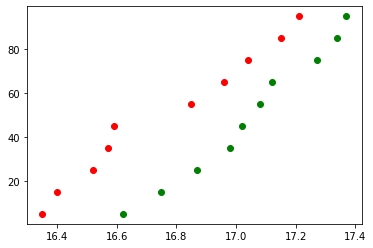

In [ ]:
# normal probability plot 
plt.plot(Y1_sorted,Q, 'ro')
plt.plot(Y2_sorted,Q, 'go')

#### Using Scipy - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

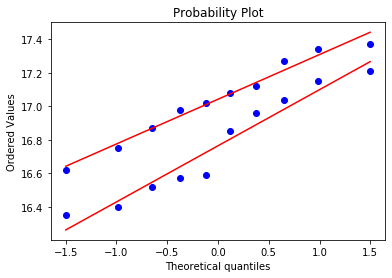

In [ ]:
sp.stats.probplot(Y1, plot=plt)
sp.stats.probplot(Y2, plot=plt)
plt.show() # Notice the difference with the previous plot (Axes!)

# =======================================================
#                                             Hypothesis Testing
# =======================================================

### t-test with and without equal variance https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [ ]:
def tTest(sample1, sample2, alpha, equalVariance = True):
    """
    
    """
    dof = len(sample1) + len(sample1) -2 # degree of freedom
    t1, p1 = stats.ttest_ind(sample1,sample2, equal_var = equalVariance) # returns test statistic and p-value
    t_crt_twoTailed = stats.t.ppf((1-alpha/2), dof) # Critical t two-tail
    t_crt_oneTailed = stats.t.ppf((1-alpha), dof) # Critical t one-tail
    p_oneTailed = p1/2 # p-value one-tail
    df = pd.DataFrame([[t1], [t_crt_twoTailed], [p1], [t_crt_oneTailed], [p_oneTailed], [alpha]], index = 
                      ['Test statistic', 'Critical t (two-tail)', 'p-value (two-tail)','Critical t (one-tail)',
                       'p-value (one-tail)', 'alpha'])
    return df

In [ ]:
Y1 = [16.85,16.4,17.21,16.35,16.52,17.04,16.96,17.15,16.59,16.57]
Y2 = [16.62,16.75,17.37,17.12,16.98,16.87,17.34,17.02,17.08,17.27]
alpha = 0.05
tTest(Y1,Y2, alpha, equalVariance=True)

,0
Test statistic,-2.186876
Critical t (two-tail),2.100922
p-value (two-tail),0.042197
Critical t (one-tail),1.734064
p-value (one-tail),0.021098
alpha,0.050000


### Paired t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel

In [ ]:
def tTest_paired(sample1, sample2, alpha):
    """
    
    """
    dof = len(sample1) - 1 # degree of freedom
    t1, p1 = stats.ttest_rel(sample1, sample2) # returns test statistic and p-value
    t_crt_twoTailed = stats.t.ppf((1-alpha/2), dof) # Critical t two-tail
    t_crt_oneTailed = stats.t.ppf((1-alpha), dof) # Critical t one-tail
    p_oneTailed = p1/2 # p-value one-tail
    df = pd.DataFrame([[t1], [t_crt_twoTailed], [p1], [t_crt_oneTailed], [p_oneTailed], [alpha]], index = 
                      ['Test statistic', 'Critical t (two-tail)', 'p-value (two-tail)','Critical t (one-tail)',
                       'p-value (one-tail)', 'alpha'])
    return df


In [ ]:
# Paired t-test example
Y1 = [16.85,16.4,17.21,16.35,16.52,17.04,16.96,17.15,16.59,16.57]
Y2 = [16.62,16.75,17.37,17.12,16.98,16.87,17.34,17.02,17.08,17.27]
alpha = 0.05
tTest_paired(Y1, Y2, alpha)

,0
Test statistic,-2.456173
Critical t (two-tail),2.262157
p-value (two-tail),0.036386
Critical t (one-tail),1.833113
p-value (one-tail),0.018193
alpha,0.050000


### F-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

In [ ]:
# F-test function
import numpy as np
def fTest(sample1, sample2, alpha):
    dof1 = len(sample1)-1
    dof2 = len(sample2)-1
    
    F = np.var(sample1, ddof=1) / np.var(sample2, ddof=1) # Test Statistic
    F_crt_upper = stats.f.ppf(1-alpha/2, dof1, dof2) # upper tail critical F
    F_crt_lower = 1/(stats.f.ppf(1-alpha/2, dof1, dof2)) # lower tail critical F
    F_crt_onetail = stats.f.ppf(1-alpha, dof1, dof2) # one-tail critical F
    pvalue = 1 - stats.f.cdf(F, dof1, dof2) # P value
    
    df = pd.DataFrame([[F], [F_crt_upper], [F_crt_lower], [F_crt_onetail], [pvalue], [alpha]], index = 
                      ['Test statistic', 'Critical F - upper (two-tail)', 'Critical F - lower (two-tail)',
                       'Critical F (one-tail)','p-value', 'alpha'])
    return df



In [ ]:
# F-test example
y1 = [64,71,83,59,65,56,69,74,82,79]
y2 = [65,81,57,66,82,82,67,59,75,70]
alpha = 0.05

fTest(y1,y2,alpha)

,0
Test statistic,1.022268
Critical F - upper (two-tail),4.025994
Critical F - lower (two-tail),0.248386
Critical F (one-tail),3.178893
p-value,0.487183
alpha,0.050000


#### Z-test 

In [ ]:
# Manual calculation

alpha = 0.05

Y1 = [16.03,16.04,16.05,16.05,16.02,16.01,15.96,15.98,16.02,15.99]
Y2 = [16.02,15.97,15.96,16.01,15.99,16.03,16.04,16.02,16.01,16]

sample1 = Y1
sample2 = Y2

Y1_m = np.mean(sample1) # sample 1 mean
Y2_m = np.mean(sample2) # sample 2 mean

n1 = len(sample1)  # sample size
n2 = len(sample2)  # sample size

var1 = 0.000225 # sample 1 variance
var2 = 0.000324 # sample 2 variance

denominator = np.sqrt((var1/n1) + (var2/n2))

Z = (Y1_m - Y2_m)/denominator # test statistic

pvalue_twotailed = 2*(1-stats.norm.cdf(np.abs(Z))) # p-value - two-tail
pvalue_onetailed = 1-stats.norm.cdf(np.abs(Z)) # p-vale - one-tail

Z_crt_twotailed = stats.norm.ppf(1-alpha/2) # critical Z - two-tail
Z_crt_onetailed = stats.norm.ppf(1-alpha) # critical Z - one-tail



In [ ]:
# Z-test function
def ZTest(sample1, sample2, var1, var2, alpha):
    sample1 = Y1
    sample2 = Y2
    
    Y1_m = np.mean(sample1) # sample 1 mean
    Y2_m = np.mean(sample2) # sample 2 mean
    
    n1 = len(sample1)  # sample size
    n2 = len(sample2)  # sample size
    
    denominator = np.sqrt((var1/n1) + (var2/n2))

    Z = (Y1_m - Y2_m)/denominator # test statistic

    pvalue_twotailed = 2*(1-stats.norm.cdf(np.abs(Z))) # p-value - two-tail
    pvalue_onetailed = 1-stats.norm.cdf(np.abs(Z)) # p-vale - one-tail

    Z_crt_twotailed = stats.norm.ppf(1-alpha/2) # critical Z - two-tail
    Z_crt_onetailed = stats.norm.ppf(1-alpha) # critical Z - one-tail
    
    df = pd.DataFrame([[Z], [Z_crt_twotailed], [pvalue_twotailed], [Z_crt_onetailed], [pvalue_onetailed], [alpha]],
                index = ['Test statistic', 'Critical Z (two-tail)', 'p-value (two-tail)', 'Critical Z (one-tail)', 
                        'p-value (one-tail)', 'alpha'])
    return df
    

In [ ]:
# Z-test example
Y1 = [16.03,16.04,16.05,16.05,16.02,16.01,15.96,15.98,16.02,15.99]
Y2 = [16.02,15.97,15.96,16.01,15.99,16.03,16.04,16.02,16.01,16]
var1 = 0.000225 
var2 = 0.000324 
alpha = 0.05
ZTest(Y1, Y2, var1, var2, alpha)

,0
Test statistic,1.349627
Critical Z (two-tail),1.959964
p-value (two-tail),0.177136
Critical Z (one-tail),1.644854
p-value (one-tail),0.088568
alpha,0.050000


## Thank you